<a id='0'></a>
### 　　目　录
* [课程1.聚类](#1)



* [课程2： 层次聚类与密度聚类](#2)　　
　
 
 
* [课程 3：高斯混合模型与聚类验证](#3)　　


 
* [课程 4：特征缩放](#4)


* [课程 5： PCA（主成分分析)](#5)

<a id='1'></a>
# [1.聚类](#0)

### 1.2.
> dataset without labels all the data points are of same class
* clusters in the data 数据的聚类（簇）
* dimensionality reducetion 降维

### 1.4
> 聚类算法如：K-Means   

重复执行1.2
1.assign 分配
2.optimize 优化 降低距离中心总的二次距离b


<a id='2'></a>
# [2. 层次聚类与密度聚类](#0)

### 2.1.
<img src = './img/K-means情况.png' width = '77%'>


### 2.2.其他聚类方法
* Hierarchical Clustering 层次聚类
* Density_based Clustering 密度聚类 (well on the two-cresect dataset(双月牙形))
   * 关注其中的DBSCAN(Density_based Spatial Clustering of Applications with Noise)
<img src = "./img/层次聚类and密度聚类.png" width ="88%">

### 2.3.层次聚类：单链接聚类法
 
dendgrogram 系统树图
<img src = "./img/linkage_dendrogram.png"    width="66%">
* single link clustering 
    * assume each point is a cluster
    * calculate the distances and choose the smallest distance between two clusters. group those two points into a cluster
**关注类的最短距离**    
##### can give eithet one cluster or the number of our smaples     
<img src = "./img/single_link_clustering.png " width = "77%">


### 2.4. 检测单链接聚类


<img src ="./img/k_maeans_vs_single_linkA_clustering.png"  width="77%">

### 2.5. 三种不同的层次聚类法
> part of agglomerative clustering(凝聚聚类) component of Scikit-learn
层次聚类包括凝聚聚类


#### 凝聚聚类的三种方法
> 没有单链接法

*  **全连接法**   
 
     **区别：关注类与类之间点的远距离中的最小值**

* **组平均法（average link )**
> 计算类之间点距离的平均值

*  **Ward's metod(离差平方和法)**
取类之间点的中间点，计算此点到所有点的距离平方和，然后减去类中的变量（类中取中点，计算与类中点的平方和）。
最后将两类间最小的，聚类。
<img src = "./img/Ward's_method.png" width='77%'>

### 2.6. 层次聚类法的具体使用


In [ ]:
from sklearn import datasets, cluster
# Load dataset
X = datasets.load_iris().data[:10]

# linkage : {“ward”, “complete”, “average”}, optional, default: “ward”
# n_clusters : int, default=2nThe number of clusters to find.
clust = cluster.AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

labels = clust.fit_predict(X)

如果要画出层次树（系统树）
hierarchical tree shapes called dendrograms


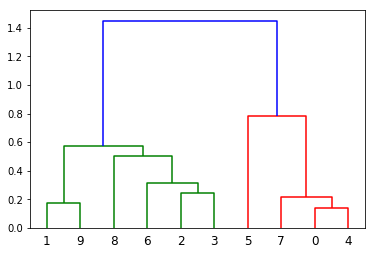

In [15]:
from scipy.cluster.hierarchy import dendrogram, ward, single
from sklearn import datasets
import matplotlib.pyplot as plt

X = datasets.load_iris().data[:10]
# 用ward做聚类，传回关系矩阵
linkage_matrix = ward(X)
dendrogram(linkage_matrix)
plt.show()

### 标准化对聚类的影响
如iris数据，第四列比其他小，方差影响对聚类的处理。由此进行标准化操作，使每个维度位于（0，1）  
方法：每列减去最小值，初一范围，利用sklearn提供的preprocessing.normalize()工具
` normalized_X = preprocessing.normalize(iris.data) `


 ### 2.9 . HC 实例与应用
 **advantages**  
 * Resulting hierarchical represetation can be very informative
 * provides an additional ability to visualize
 * Especially potent when the dataset contains real hierarchical relationships(e.g. Evolutionary biology)  
 

 **disadvantages**  
 * Sensitive to noise and outliers(离散群）
 * Computationally inensive O(N^2)
 
 
### 2.11. DBSCAN
One of Density_based Clustering 密度聚类
* Epsilon :Search distance around point
* MinPts: Minimum number of points required to form a density cluster  
==> Noise point(不符合的点)  
==> Core point（符合的点）  
==> Border poin（不符合的点，但是被某个core point包含进去的点）  


<img src = "./img/k_maeans_vs_DBSCAN.png" width="77%">

In [2]:
from sklearn import datasets, cluster
X = datasets.load_iris().data

db = cluster.DBSCAN(eps = 0.5, min_samples = 5)
db.fit(X)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

 ### 2.15 . DBSCAN 实例与应用
 **advantages**  
 * We don't need to specify the number of clusters
 * Flexibility in the shapes & sizes of clusters (能灵活的找到并分类各种形状和大小的类)
 * Able to deal with noise and ooutliers

 **disadvantages**  
 * Faces difficulty finding clusters of varying densities
 * Border points that are reachable from two clusers(随机访问, 所以能达到多个类的点,会被随机分配)
 

<a id = '3'> </a>
#  [3.高斯混合模型GMM与聚类验证](#0)　　


Gaussian Mixture Model Clustering  is a soft clustering algorithm
> means every point and every sample in our dataset will belong to every cluster that we hava   
> but would hava different levels of membership in each cluster
<img src = "./img/GaussianMixtureModelClustering.png" width = "66%">

### 3.3. 一维高斯分布
> 高斯混合分布本身并不是高斯模型,可能是多个高斯模型的组合

### 3.4. 二维高斯分布
**Multivariate Gaussian distribution**
more variables ,and each of them is a Gaussian distribution

### 3.8 期望最大化算法概述
1.Initialize K gaussian distributions
2.soft-cluster data-"expectation" called the Expectation step or the E step
3.re-estimate the Gaussians based on the soft clustering  called Maximization or M step
4.evluate log-likelihood to check for convergence 评估对数似然来检查收敛
> 不收敛，跳到第二部继续执行

### 3.9-10. 期望最大化
1.Initialize gaussian distributions like use k-means

2.step2
<img src = "./img/gaussian_step2.png" width = "88%">

3. step3
<img src = "./img/gaussian_step3-1.png" width = "88%">
<img src = "./img/gaussian_step3-2.png" width = "88%">

4.evaluate the log-likelihood

$$ ln p (X\mid\mu,\sigma^2) = \sum_{i=1}^{N}ln(\sum_{k=1}^{K}\pi_kN(X_i\mid\mu_k,\sigma{_k^2})) $$

the **higher** this number is ,the more sure we are that the mixer model that we've generated(越能确定生成的混合模型可以负责创建数据)

### 3.11. 期望最大化示例
Initialization：Default(k-means)

### 3.13 GMM 实现

In [5]:
 
from sklearn import datasets, mixture
X = datasets.load_iris().data[:10]
gmm = mixture.GaussianMixture(n_components = 3)
gmm.fit(X)
clustering = gmm.predict(X)


### 3.14. GMM 示例与应用

**advantages**  
 * Soft-clustering (sample membership of multiple clusters)
 * Cluster shape flexibility
   a cluster can contain another cluster inside of ti 
 

**disadvantages** 
 * Sensitive to initialization values 
 * Possible to converge to local optimum (局部最优)
 * lead convergence(收敛) slowly)  
 
 
 ### 3.15. 聚类分析过程
 DARA <<<--->>> feature selection/extraction(特征选择/特征提取)
    <<<--->>> clustering algorithm selection&tuning:based on what you need to do and how your data looks 
    <<<--->>> clustering validation(聚类评价)：use indices(指数)
    <<<--->>> results interpretation(聚类结果解释)
    
### 3.16. 聚类验证
**indices**  
* External indices :　use for data was originally labelled;score how a clustering method did
* Internal indices :  not labelled specifically with unsupervised learning；　
* Relative indices :　indicate which of two clustering structures is better in some sense
> basically, all internal can server as relative indices  

**defined by**
* Compactness　：　how close of elements  in the same cluster 
* Separability　：how far between differernt clusters

### 3.17 External indices 外部评价指标
例如： Adjusted Rand Index
[-1,1]   
$$Rand \; Index = \frac{a+b} {2n}$$

* a: number of pairs in the same cluster C and in the same cluster in K
* b: number of pairs in a different cluster C and in a different cluster in K
* n: number of samples/points

### 3.19 Internal Indices
例如：silhouette index (轮廓系数)
[-1,1]  
$$S_i = \frac{b_i-a_i}{ max(a_i,b_i)}$$
* a: average distance to other samples in the same cluster
* b: average distance to samples in the **closet neighboring**  cluster

should not use in cluster like  two rings datasets



<a id = '4'> </a>
# [4.特征缩放](#0)

feature scaling
**避免一个特种覆盖另一种**
### 4.7-8
$0\leq X^\prime \leq1$
$$X^\prime= \frac{X-X_{min}}{X_{max} - X_{min}}$$
advantage: can expect in the output (预估输出相对稳定)
disadvantage: if have outlies in input（输入特征有异常数值，会很棘手）

那种算法会受到特种缩放影响：(变量增大，值变大)
* SVM : make one twice as big as the other,it counts for twice as much
* K-means: aslo distance has exactly the same characterization
* Decision Trees:no
* Linear tegression: feature A donesn't effect feature B


In [80]:
def featureScaling(arr):
    a = max(arr)
    b = min(arr)
    list = []
    for i in range(len(arr)):
        x =((arr[i]-b)/(a-b))
        list.append(x)
    return list
data = [115, 140, 175]
print (featureScaling(data))


[0.0, 0.4166666666666667, 1.0]


<a id = '5'></a>
# [5 PCA（主成分分析)](#0)


Principle COmponent Analysis
### 5.1-5 数据维度

### 5.6. 用于数据转换的PCA
> PCA finds a new coordinate system that's obtained from the old one by translation and rotation only.（仅通过转化和轮换获取新坐标）
* moves the x-axis into the priccipal axis of variation(most variation relative to all the data points(x轴变化大))
* aligns the x axis with the principal axis of varitation*

### 5.9

when we write vectors in PCA,lowest output vectors is normalized to one 

<img src = "./img/PCA_normalized.png" width ="88%">
### 5.10-11. center and axis 
**find**
1.the center of the data 
2.principle axis of variaton(主变量轴)
* PCA also returns an importance value,a spread value(散布值) of this axis.
>  spread value tends to be very large for the very  first axis fo variation and much smaller for the second axis fo variation if the spread is small.
orthogonality vectors

### 5.12 那些数据可以用于PCA ？？？？

### 5.13.
captures 捕获更多数据的，更占优势，轴方向数据更多
### 5.14 . 可测量的特征与潜在的特征练习
* decision tree classifier ：决策结构，每个决策都会导致一系列后果和附加决策
* SVC ： 用于分类
* linear regerssion : 用于预测数据
